<a href="https://colab.research.google.com/github/oktaw-g/AI/blob/main/P6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wczytanie YOLO

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 25.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2 as cv
import numpy as np

model_yolo = YOLO("yolo11n") # Używamy modelu trenowanego na zestawie COCO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 306MB/s]


In [ ]:
import matplotlib.pyplot as plt

def show_results(results):
    # Visualize the results
    for i, r in enumerate(results):
        image = cv.cvtColor(r.plot(), cv.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

#Zestaw treningowy

In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/data.yaml       
   creating: Dataset/test/
 extracting: Dataset/test/0.jpg      
  inflating: Dataset/test/0.txt      
  inflating: Dataset/test/1.jpg      
  inflating: Dataset/test/1.txt      
  inflating: Dataset/test/10.jpg     
  inflating: Dataset/test/10.txt     
 extracting: Dataset/test/11.jpg     
  inflating: Dataset/test/11.txt     
  inflating: Dataset/test/12.jpg     
  inflating: Dataset/test/12.txt     
 extracting: Dataset/test/13.jpg     
  inflating: Dataset/test/13.txt     
  inflating: Dataset/test/14.jpg     
  inflating: Dataset/test/14.txt     
  inflating: Dataset/test/15.jpg     
  inflating: Dataset/test/15.txt     
 extracting: Dataset/test/16.jpg     
  inflating: Dataset/test/16.txt     
  inflating: Dataset/test/17.jpg     
  inflating: Dataset/test/17.txt     
  inflating: Dataset/test/18.jpg     
  inflating: Dataset/test/18.txt     
  inflating: Dataset/test/19.jpg     
  inflating: Data

In [ ]:
import os

PATH_TO_DATASET_CONFIG = os.path.abspath("Dataset/data.yaml")

import yaml

with open(PATH_TO_DATASET_CONFIG, "r") as file:
    data = yaml.safe_load(file)

data['path'] = os.path.dirname(PATH_TO_DATASET_CONFIG)

with open(PATH_TO_DATASET_CONFIG, "w") as file:
    yaml.dump(data, file)

print(f"Zawartość pliku \'{PATH_TO_DATASET_CONFIG}\':")
for key, value in data.items():
    print(f"{key}: {value}")

Zawartość pliku '/content/Dataset/data.yaml':
names: ['nakretka', 'sruba']
path: /content/Dataset
test: test
train: train
val: val


In [ ]:
import glob

print("Zawartość zbioru danych:")
for subset in ("train", "val", "test"):
    labels = glob.glob(f"{data['path']}/{subset}/*.txt")
    print(f"\t{subset}: {len(labels)} etykiet(y)")

Zawartość zbioru danych:
	train: 120 etykiet(y)
	val: 40 etykiet(y)
	test: 40 etykiet(y)


/content/Dataset/train/118.txt
['0', '0.66992', '0.60840', '0.09375', '0.09180']
['1', '0.22461', '0.11328', '0.14062', '0.14160']
['1', '0.79785', '0.07520', '0.31348', '0.14258']


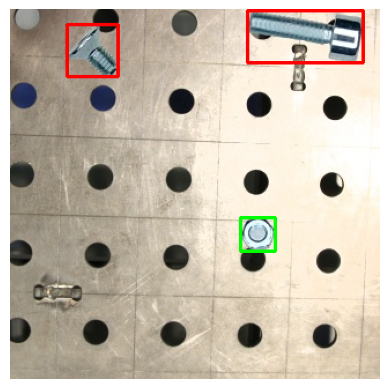

In [ ]:
import random

SUBSET = 'train'

labels = glob.glob(f"{data['path']}/{SUBSET}/*.txt")

random_label = random.choice(labels)
random_image = random_label.replace(".txt", ".jpg")

print(random_label)

with open(random_label, "r") as file:
    labels = file.readlines()

image = cv.imread(random_image)

for label in labels:
    label = label.strip().split()
    print(label)
    x, y, w, h = [float(x) for x in label[1:]]
    classname = int(label[0])
    x1, y1 = int((x - w / 2) * image.shape[1]), int((y - h / 2) * image.shape[0])
    w, h = int(w * image.shape[1]), int(h * image.shape[0])

    cv.rectangle(image, (x1, y1), (x1 + w, y1 + h), (0, 255, 0) if classname==0 else (0,0,255), 2)

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()


#Hiperparametry i ponowne wczytanie podstawowego YOLO

In [ ]:
hiperparametry = {
    "imgsz": 320, # image size (int)
    "epochs": 30, # number of epochs (int)
    "batch": 10, # batch size (int)
    # LOSS GAIN --------------------------------------------------------------- #
    "box":  7.5, # box loss gain
    "cls":   0.50, # cls loss gain
    "dfl":  1.50, # dfl loss gain
    # OPTIMIZER --------------------------------------------------------------- #
    "optimizer":  "Adam", # optimizer name from torch.
    # LEARNING RATE ----------------------------------------------------------- #
    "lr0":   0.0015, # initial learning rate (SGD=1E-2, Adam=1E-3)
    "lrf":   0.01, # final OneCycleLR learning rate (lr0 * lrf)
    # MOMENTUM ---------------------------------------------------------------- #
    "momentum":  0.937, # SGD momentum/Adam beta1
    # DECAY ------------------------------------------------------------------- #
    "weight_decay":  0.0005, # optimizer weight decay
    # PATIENCE
    "patience": 10, # early stopping patience (epochs)
    # WARMUP ------------------------------------------------------------------ #
    "warmup_epochs": 3.00, # warmup epochs (fractions ok)
    "warmup_momentum":   0.80, # warmup initial momentum
    "warmup_bias_lr": 0.10, # warmup initial bias lr
    # AUGMENTATION ------------------------------------------------------------ #






    #"hsv_h": 0.0, # image HSV-Hue augmentation (fraction)         #1
    #"hsv_s": 0.0, # image HSV-Saturation augmentation (fraction)  #1
    #"hsv_v": 0.0, # image HSV-Value augmentation (fraction)       #1

    #"flipud": 0.0, # image flip up-down (probability)             #2
    #"fliplr": 0.0, # image flip left-right (probability)          #2

    #"degrees":   0.0, # image rotation (+/- deg)                  #3
    #"translate": 0.0, # image translation (+/- fraction)          #3

    #"scale": 0.0, # image scale (+/- gain)                        #4
    #"shear": 0.0, # image shear (+/- deg)
    #"perspective":   0.0, # image perspective (+/- fraction), range 0-0.001

    "mosaic": 0.0, # image mosaic (probability)                   #5
    "close_mosaic": 0, # close mosaic for N ending epochs
}

model_yolo = YOLO("yolo11n") # Używamy modelu trenowanego na zestawie COCO

#Trening

In [ ]:
model_yolo = YOLO("yolo11n")

kwargs = {
    "data": PATH_TO_DATASET_CONFIG,
    "project": "models",
    "name": "Run1NoAUG",
    "exist_ok": True,
    "plots": True,

}

model_yolo.train(
    **(kwargs | hiperparametry)
)

print("Koniec treningu!")

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Dataset/data.yaml, epochs=30, time=None, patience=10, batch=10, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=models, name=Run1NoAUG, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning /content/Dataset/train.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Dataset/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to models/Run1NoAUG/labels.jpg... 
optimizer: Adam(lr=0.0015, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to models/Run1NoAUG
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      0.51G     0.8207      2.842     0.9583         32        320: 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         40        139     0.0045      0.491      0.339      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30     0.476G     0.8278      1.731     0.9404         37        320: 100%|██████████| 12/12 [00:01<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         40        139    0.00446      0.486      0.366      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30     0.476G     0.8312      1.393     0.9733         37        320: 100%|██████████| 12/12 [00:01<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         40        139     0.0446      0.983      0.624      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      0.48G     0.7978      1.236     0.9371         27        320: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         40        139     0.0162      0.986      0.582        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      0.48G     0.8007      1.183     0.9732         34        320: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         40        139     0.0153      0.995      0.576      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      0.48G     0.8028      1.077      0.966         30        320: 100%|██████████| 12/12 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         40        139      0.978      0.194      0.665      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30     0.474G     0.7833      1.029      0.959         35        320: 100%|██████████| 12/12 [00:01<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         40        139      0.965      0.184       0.78       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      0.48G     0.7503     0.9837     0.9364         29        320: 100%|██████████| 12/12 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         40        139      0.945      0.388      0.847      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30     0.478G     0.7138     0.9307     0.9319         28        320: 100%|██████████| 12/12 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         40        139      0.814        0.6      0.845       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      0.48G       0.72     0.8736     0.9166         32        320: 100%|██████████| 12/12 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         40        139      0.897      0.786      0.893      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      0.48G     0.6747     0.8354     0.8941         40        320: 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]


                   all         40        139      0.937      0.825      0.925      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      0.48G     0.6843     0.8576      0.925         28        320: 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]

                   all         40        139      0.954        0.8      0.929      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      0.48G      0.647     0.8232     0.8886         32        320: 100%|██████████| 12/12 [00:01<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         40        139       0.81      0.894      0.924      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      0.48G     0.6797     0.8164     0.9084         29        320: 100%|██████████| 12/12 [00:01<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         40        139      0.852      0.837      0.908      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30     0.478G     0.6466      0.786     0.8749         29        320: 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         40        139      0.827      0.846      0.895      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      0.48G     0.6736     0.7906       0.92         37        320: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         40        139      0.883      0.858      0.919      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      0.48G     0.6787     0.7489     0.8998         33        320: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         40        139      0.904      0.898      0.934       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      0.48G     0.6105     0.6944      0.911         37        320: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         40        139      0.906      0.923      0.934      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      0.48G     0.6399     0.7175      0.898         35        320: 100%|██████████| 12/12 [00:02<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         40        139      0.897       0.94      0.944      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      0.48G     0.6539     0.7032      0.913         37        320: 100%|██████████| 12/12 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all         40        139      0.924      0.926      0.959      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      0.48G     0.6102     0.6981     0.8936         31        320: 100%|██████████| 12/12 [00:01<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         40        139      0.916      0.908      0.959      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      0.48G     0.5992      0.649     0.8766         35        320: 100%|██████████| 12/12 [00:01<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         40        139      0.938      0.917      0.958      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30     0.478G     0.5789     0.6492     0.8708         32        320: 100%|██████████| 12/12 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]


                   all         40        139      0.904      0.954      0.955      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      0.48G      0.533       0.62     0.8653         29        320: 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         40        139      0.866      0.947      0.953      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      0.48G     0.5449     0.6274     0.8763         39        320: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]


                   all         40        139      0.854      0.933       0.95      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30     0.478G     0.5121     0.6013     0.8561         27        320: 100%|██████████| 12/12 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         40        139      0.854      0.929      0.951      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      0.48G      0.498     0.5948     0.8549         31        320: 100%|██████████| 12/12 [00:01<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         40        139      0.916       0.89      0.954      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30     0.478G     0.5389     0.6054     0.8623         29        320: 100%|██████████| 12/12 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         40        139      0.955      0.923       0.96       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      0.48G     0.5008     0.6074     0.8779         33        320: 100%|██████████| 12/12 [00:01<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         40        139       0.95      0.924      0.961      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      0.48G     0.5017     0.5986     0.8523         32        320: 100%|██████████| 12/12 [00:01<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all         40        139      0.951      0.924       0.96      0.874



30 epochs completed in 0.040 hours.
Optimizer stripped from models/Run1NoAUG/weights/last.pt, 5.5MB
Optimizer stripped from models/Run1NoAUG/weights/best.pt, 5.5MB

Validating models/Run1NoAUG/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


                   all         40        139       0.95      0.924      0.961      0.878
              nakretka         23         29      0.961      0.857      0.947      0.877
                 sruba         40        110       0.94      0.991      0.974      0.878
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to models/Run1NoAUG
Koniec treningu!


In [ ]:
model_yolo = YOLO("models/Run1NoAUG/weights/best.pt")

metrics_1_val = model_yolo.val(conf=.25, data=PATH_TO_DATASET_CONFIG, split='val', project="models", name="Run1NoAUG_val", exist_ok=True)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Dataset/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]


                   all         40        139       0.95      0.924      0.948      0.884
              nakretka         23         29      0.961      0.857      0.922      0.869
                 sruba         40        110      0.939      0.991      0.974      0.899
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to models/Run1NoAUG_val


In [ ]:
metrics_1_test = model_yolo.val(conf=.25, data=PATH_TO_DATASET_CONFIG, split='test', project="models", name="Run1NoAUG_test", exist_ok=True)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Dataset/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


                   all         40        133      0.939      0.812      0.912      0.761
              nakretka         21         30          1      0.682      0.861        0.7
                 sruba         40        103      0.879      0.942      0.964      0.821
Speed: 0.1ms preprocess, 4.3ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to models/Run1NoAUG_test


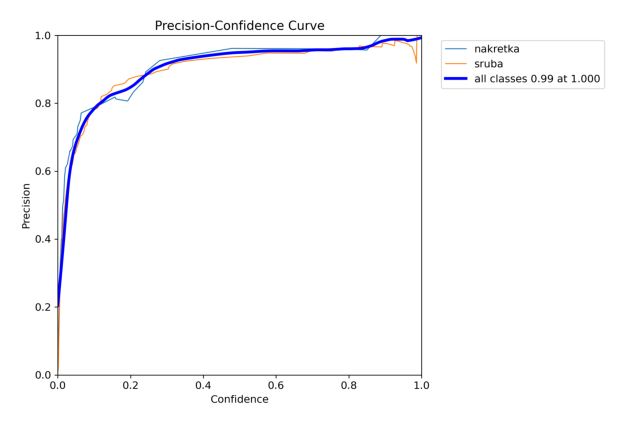

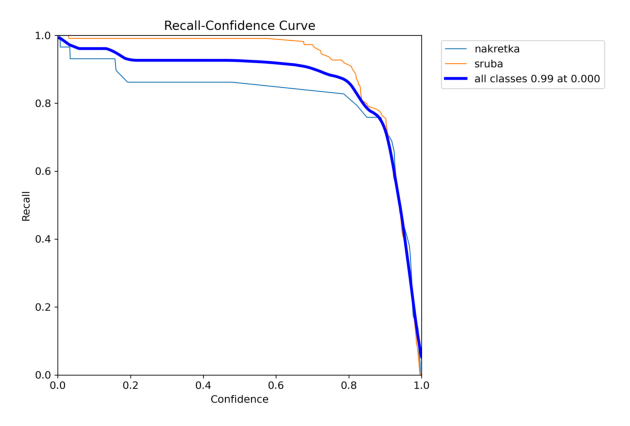

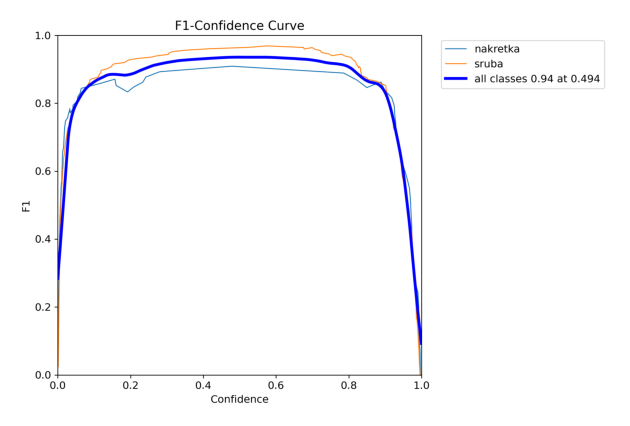

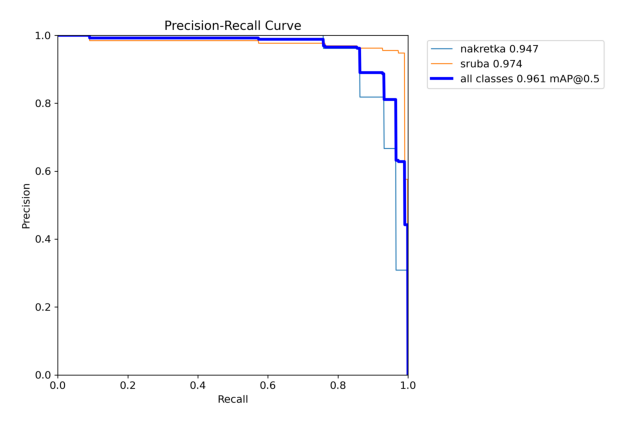

In [ ]:
path = "models/Run1NoAUG/"
for name in (
    "P_curve.png",
    "R_curve.png",
    "F1_curve.png",
    "PR_curve.png",
):

    image = cv.imread(path+name)

    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

#Augmentacja

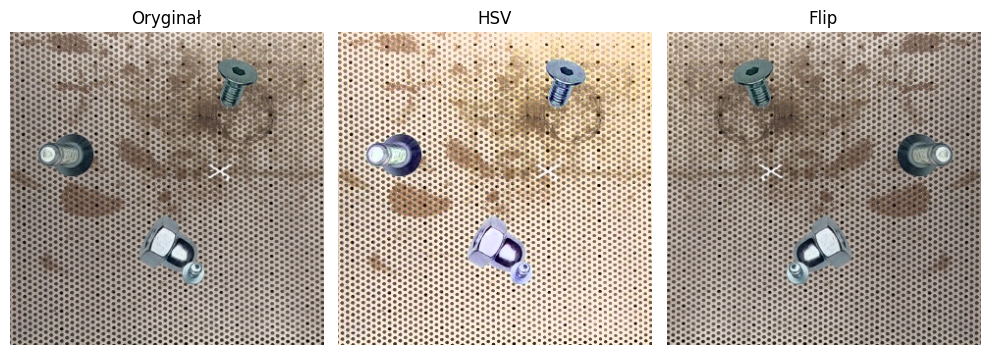

In [ ]:
image = cv.imread("Dataset/train/0.jpg")

h,s,v = cv.split(cv.cvtColor(image, cv.COLOR_BGR2HSV))

h = np.mod(h.astype(np.float32)*1.20,180).astype(np.uint8)
s = np.clip(s.astype(np.float32)*1.30,0,255).astype(np.uint8)
v = np.clip(v.astype(np.float32)*1.50,0,255).astype(np.uint8)

image_hsv = cv.merge([h,s,v])

image_flip = cv.flip(image, 1)

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(image_hsv, cv.COLOR_HSV2RGB)
image_flip = cv.cvtColor(image_flip, cv.COLOR_BGR2RGB)


fig, axes = plt.subplots(1,3, figsize=(10,5))

axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title("Oryginał")

axes[1].imshow(image_hsv)
axes[1].axis('off')
axes[1].set_title("HSV")

axes[2].imshow(image_flip)
axes[2].axis('off')
axes[2].set_title("Flip")

fig.tight_layout()
fig.show()

#Trening z Augmentacją

In [ ]:
hiperparametry["epochs"] = 30

hiperparametry["hsv_h"] = 0.015
hiperparametry["hsv_s"] = 0.70
hiperparametry["hsv_v"] =  0.40

hiperparametry["degrees"] = 5.0
hiperparametry["translate"] = 0.15

hiperparametry["scale"] = 0.10
hiperparametry["shear"] = 0.0
hiperparametry["perspective"] = 0.0
hiperparametry["flipud"] = 0.50
hiperparametry["fliplr"] = 0.50
hiperparametry["mosaic"] = 1.0
hiperparametry["close_mosaic"] = 5

In [ ]:
model_yolo = YOLO("yolo11n")

kwargs = {
    "data": PATH_TO_DATASET_CONFIG,
    "project": "models",
    "name": "Run2WithAUG",
    "exist_ok": True,
    "plots": True,

}

model_yolo.train(
    **(kwargs | hiperparametry)
)

print("Koniec treningu!")

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Dataset/data.yaml, epochs=30, time=None, patience=10, batch=10, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=models, name=Run2WithAUG, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=5, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

train: Scanning /content/Dataset/train.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Dataset/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to models/Run2WithAUG/labels.jpg... 
optimizer: Adam(lr=0.0015, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to models/Run2WithAUG
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      0.51G     0.9664      2.937      1.035         44        320: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         40        139    0.00454      0.495     0.0715     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30     0.474G     0.9693      1.863      1.022         55        320: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         40        139     0.0045      0.491      0.331      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30     0.478G      1.043      1.696      1.069         52        320: 100%|██████████| 12/12 [00:01<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         40        139     0.0193      0.995      0.557        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30     0.478G      1.045      1.469      1.054         42        320: 100%|██████████| 12/12 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         40        139      0.516      0.495      0.645      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30     0.478G      0.954      1.328       1.02         49        320: 100%|██████████| 12/12 [00:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         40        139      0.937      0.277      0.672      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30     0.478G      0.955       1.22       1.03         45        320: 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]


                   all         40        139      0.953      0.395      0.711      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30     0.476G     0.9904      1.149      1.049         36        320: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]


                   all         40        139      0.905      0.418      0.813      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30     0.476G     0.9385      1.137      1.016         32        320: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         40        139       0.88      0.499       0.86      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30     0.478G     0.9053      1.081      1.008         46        320: 100%|██████████| 12/12 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         40        139      0.819      0.491      0.887      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30     0.478G     0.8735       1.06     0.9882         55        320: 100%|██████████| 12/12 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         40        139      0.758      0.686      0.914      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30     0.478G     0.9021      1.046      1.001         49        320: 100%|██████████| 12/12 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all         40        139      0.869      0.891      0.957      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30     0.478G     0.8888      1.017          1         42        320: 100%|██████████| 12/12 [00:01<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         40        139      0.898      0.861      0.959      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30     0.478G     0.9276     0.9908       1.02         42        320: 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         40        139      0.789      0.892      0.925      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30     0.478G     0.8651     0.9723     0.9867         46        320: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         40        139      0.888      0.887      0.942      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30     0.478G     0.8764     0.9464     0.9966         50        320: 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         40        139      0.956      0.902      0.953      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30     0.478G     0.8815     0.9496      1.028         52        320: 100%|██████████| 12/12 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         40        139      0.953       0.91      0.945      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30     0.478G     0.8141     0.8944      0.985         60        320: 100%|██████████| 12/12 [00:01<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         40        139      0.932      0.909      0.929      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30     0.478G     0.8303     0.9167     0.9872         47        320: 100%|██████████| 12/12 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         40        139       0.96      0.895      0.937      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      0.48G     0.8314     0.8875     0.9841         55        320: 100%|██████████| 12/12 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         40        139      0.943      0.872      0.946      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30     0.476G      0.844     0.8973     0.9932         42        320: 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]


                   all         40        139      0.881      0.919      0.949      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30     0.478G     0.7647     0.8472     0.9644         37        320: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         40        139      0.886       0.94      0.953      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30     0.478G     0.7618     0.8202     0.9444         40        320: 100%|██████████| 12/12 [00:01<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]


                   all         40        139       0.95      0.879      0.954      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30     0.478G     0.7921     0.8277     0.9687         58        320: 100%|██████████| 12/12 [00:01<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         40        139      0.931      0.896      0.952      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30     0.476G     0.7477     0.8001     0.9327         48        320: 100%|██████████| 12/12 [00:01<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         40        139      0.917      0.905       0.95      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30     0.478G     0.7583     0.7975     0.9647         51        320: 100%|██████████| 12/12 [00:01<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         40        139      0.945      0.896       0.96      0.784


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30     0.476G     0.6647     0.7152     0.9017         42        320: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         40        139      0.904      0.939      0.971      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30     0.476G     0.6562     0.7135     0.8962         35        320: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         40        139      0.925       0.95      0.976      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30     0.476G     0.6297     0.6766     0.8929         30        320: 100%|██████████| 12/12 [00:01<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         40        139      0.926      0.952      0.978      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30     0.474G     0.6304     0.6848     0.8943         34        320: 100%|██████████| 12/12 [00:01<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all         40        139      0.929      0.952      0.979      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30     0.476G     0.6442     0.6775     0.9044         29        320: 100%|██████████| 12/12 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         40        139       0.93      0.935      0.978      0.829



30 epochs completed in 0.040 hours.
Optimizer stripped from models/Run2WithAUG/weights/last.pt, 5.4MB
Optimizer stripped from models/Run2WithAUG/weights/best.pt, 5.4MB

Validating models/Run2WithAUG/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]


                   all         40        139      0.929      0.935      0.978       0.83
              nakretka         23         29      0.898      0.897      0.972      0.849
                 sruba         40        110       0.96      0.973      0.985       0.81
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to models/Run2WithAUG
Koniec treningu!


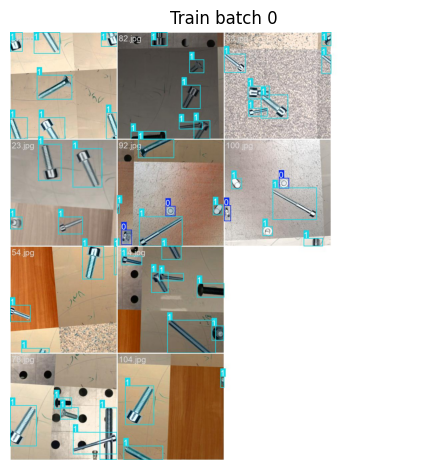

In [ ]:
path = "models/Run2WithAUG/train_batch0.jpg"

image = cv.imread(path)

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.title("Train batch 0")

plt.tight_layout()
plt.show()

#Walidacja

In [ ]:
model_yolo = YOLO("models/Run2WithAUG/weights/best.pt")

metrics_2_val = model_yolo.val(conf=.25, data=PATH_TO_DATASET_CONFIG, split='val', project="models", name="Run2WithAUG_val", exist_ok=True)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Dataset/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]


                   all         40        139       0.93      0.935      0.967      0.844
              nakretka         23         29        0.9      0.897      0.951      0.857
                 sruba         40        110       0.96      0.973      0.983      0.831
Speed: 0.2ms preprocess, 7.6ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to models/Run2WithAUG_val


In [ ]:
metrics_2_test = model_yolo.val(conf=.25, data=PATH_TO_DATASET_CONFIG, split='test', project="models", name="Run2WithAUG_test", exist_ok=True)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Dataset/test.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


                   all         40        133      0.946      0.893      0.945      0.761
              nakretka         21         30      0.962      0.853      0.918       0.74
                 sruba         40        103      0.929      0.932      0.973      0.782
Speed: 0.1ms preprocess, 4.5ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to models/Run2WithAUG_test


#Porównanie treningów

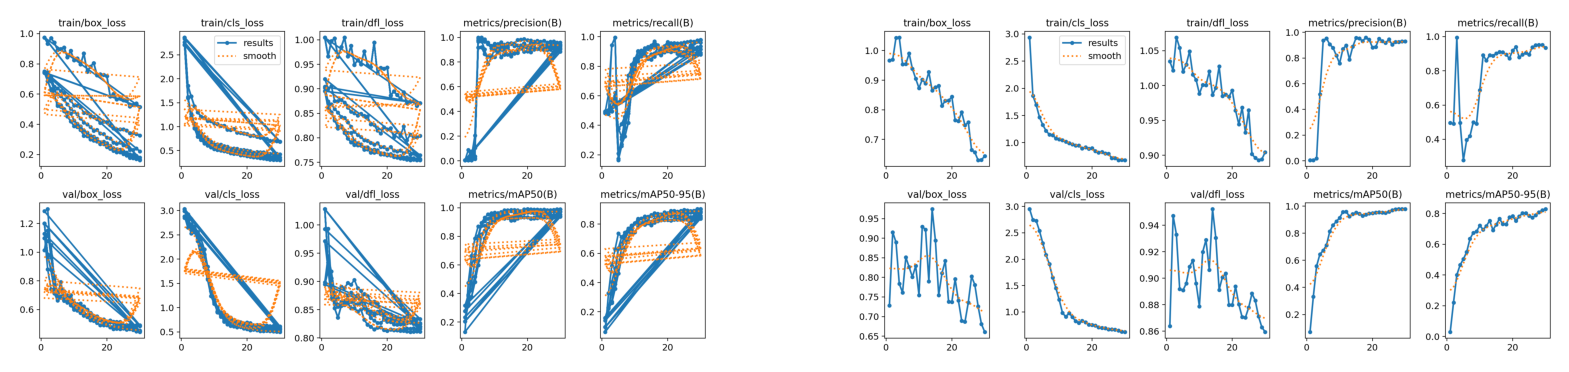

In [ ]:
path1 = "models/Run1NoAUG/results.png"
path2 = "models/Run2WithAUG/results.png"

image1 = cv.imread(path1)
image2 = cv.imread(path2)

image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(image1)
axes[0].axis('off')

axes[1].imshow(image2)
axes[1].axis('off')

plt.show()

In [ ]:
for metric in ("mAP50", "precision", "recall"):
    print(f"{metric}:")
    print("\t       Val    Test")
    print(f"\tRun 1: {metrics_1_val.results_dict[f'metrics/{metric}(B)']*100.0:.2f}, {metrics_1_test.results_dict[f'metrics/{metric}(B)']*100.0:.2f}")
    print(f"\tRun 2: {metrics_2_val.results_dict[f'metrics/{metric}(B)']*100.0:.2f}, {metrics_2_test.results_dict[f'metrics/{metric}(B)']*100.0:.2f}")

mAP50:
	       Val    Test
	Run 1: 97.31, 92.25
	Run 2: 96.72, 94.52
precision:
	       Val    Test
	Run 1: 93.17, 91.24
	Run 2: 93.04, 94.55
recall:
	       Val    Test
	Run 1: 96.57, 87.40
	Run 2: 93.46, 89.27
